# Mengenal Function Resample di Python

# Pendahuluan

Time series data adalah informasi yang sangat penting dan biasa digunakan dalam analisa, khususnya di bidang finance. Time series data mencakup informasi mengenai tanggal dan waktu. Analisa yang biasa dilakukan untuk tipe data ini adalah untuk melihat tren, pola, atau perubahan suatu variabel dari waktu ke waktu. Pandas merupakan salah satu library Python yang sangat berguna untuk menganalisis dan memanipulasi data, termasuk time series data.

Function resammple digunakan untuk mengubah frekuensi waktu, sebagai contoh jika kita memiliki data dengan frekuensi tinggi seperti harian (daily), kita bisa mengubah frekuensi-nya menjadi bulanan (monthly) untuk mengidentifikasi tren jangka panjang. Sebaliknya jika kita memiliki data dengan frekuensi rendah seperti tahunan kita bisa mengubah frekuensinya menjadi bulanan untuk menganalisa data dengan lebih detail pada tahun tersebut.

# Time Series Data

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ETH_1h.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


Untuk melakukan resample, data yang digunakan harus bertipe datetime. Saat ini kolom 'Date' bertipe data object, mari kita ubah tipe data-nya menjadi date-time

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d %I-%p')

Argumen **Format=** digunakan untuk menentukan format penulisan data date-time, kita harus menggunakan argumen ini karena format penulisan date-time pada dataset kita tidak bisa diinterpretasi langsung oleh pandas. Jika kita tidak menggunakan argumen ini maka akan muncul error.

Format:
- %Y: Tahun dengan empat digit 
- %m: Bulan dalam format angka
- %d: Hari dalam fomat angka  
- %I: Jam dalam format 12 jam
- %p: Penanda AM/PM  

Format penulisan yang biasa digunakan dan dapat diidentifikasi langsung oleh panda adalah sebagai berikut YYYY-MM-DD HH:MM:SS" atau "YYYY-MM-DDTHH:MM:SS".<br>
Jika data yang ingin kita ubah memiliki format itu, kita tidak perlu menggunakan argumen **format=** saat merubah tipe data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23674 non-null  datetime64[ns]
 1   Symbol  23674 non-null  object        
 2   Open    23674 non-null  float64       
 3   High    23674 non-null  float64       
 4   Low     23674 non-null  float64       
 5   Close   23674 non-null  float64       
 6   Volume  23674 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.3+ MB


Setelah kita mengubah tipe datanya, untuk menggunakan function kita harus membuat kolom 'Date' menjadi index. Karena function resample hanya bisa digunakan untuk index

In [7]:
df = df.set_index('Date')
df.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23674 entries, 2020-03-13 20:00:00 to 2017-07-01 11:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  23674 non-null  object 
 1   Open    23674 non-null  float64
 2   High    23674 non-null  float64
 3   Low     23674 non-null  float64
 4   Close   23674 non-null  float64
 5   Volume  23674 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.3+ MB


Kelebihan lain jika index kita berupa datetime adalah kita dapat dengan mudah melakukan slicing atau mem-filter data kita berdasarkan waktu

In [9]:
# Melihat data pada tahun 2019

df.loc['2019']

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43


In [10]:
# Melihat data pada periode 2019-01 sampai 2019-03

df.loc['2019-01': '2019-03']

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2019-03-31 23:00:00,ETHUSD,141.17,141.55,141.10,141.20,322492.15
2019-03-31 22:00:00,ETHUSD,140.85,141.17,140.61,141.17,113863.94
2019-03-31 21:00:00,ETHUSD,141.04,141.17,140.67,140.85,281007.89
2019-03-31 20:00:00,ETHUSD,141.00,141.16,141.00,141.04,99771.75
2019-03-31 19:00:00,ETHUSD,140.56,141.13,140.52,141.00,191178.60
...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43


Menerapkan fungsi agregat pada data datetime

In [11]:
df.loc['2020-01-01', 'High'].max()

132.68

Jika kita melakukan agregasi kita hanya mendapatkan 1 value, dengan resample kita dapat dengan mudah menampilkan agregasi dalam frekuensi tertentu

# Function Resample

Ada 2 macam resample yaitu: 
- upsampling = mengubah frekuensi tinggi ke frekuensi yang lebih rendah, contoh : Yearly --> Monthly
- downsampling = mengubah frekuensi rendah ke frekuensi yang lebih tinggi, contoh : Daily --? Monthly

Syntax :

**DataFrame**.resample(**Frekuensi**).**FungsiAgregat()**

## Downsampling

Mengubah frekuensi hourly menjadi daily

In [12]:
df.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [13]:
daily_high = df['High'].resample('D').max()
daily_high.head()

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
Freq: D, Name: High, dtype: float64

## Upsampling

Mengubah frekuensi hourly menjadi 15 minutes

In [14]:
df['High'].head(5).resample('15T').max()

Date
2020-03-13 16:00:00    129.51
2020-03-13 16:15:00       NaN
2020-03-13 16:30:00       NaN
2020-03-13 16:45:00       NaN
2020-03-13 17:00:00    127.42
2020-03-13 17:15:00       NaN
2020-03-13 17:30:00       NaN
2020-03-13 17:45:00       NaN
2020-03-13 18:00:00    124.85
2020-03-13 18:15:00       NaN
2020-03-13 18:30:00       NaN
2020-03-13 18:45:00       NaN
2020-03-13 19:00:00    132.02
2020-03-13 19:15:00       NaN
2020-03-13 19:30:00       NaN
2020-03-13 19:45:00       NaN
2020-03-13 20:00:00    131.82
Freq: 15T, Name: High, dtype: float64

Saat kita melakukan upsampling biasanya kita akan mendapatkan data yang memiliki value NaN, karena pada dasarnya dataset kita tidak memiliki value untuk frekuensi tersebt. Jika kita memang harus menghandle missing value tersebut kita bisa menggunakan beberapa metode, yaitu:
- .ffil()
    * Mengisi missing value dengan nilai terakhir yang diketahui
- .bfill()
    * Mengisi missing value dengan nilai berikutnya
- .interpolate()
    * Mengisi missing value dengan dengan melakukan interpolasi pada data di sekitarnya, ada beberapa metode interpolasi :
        - 'linear'
        - 'polynomial'
        - 'spline
        
Penentuan harus menggunakan metode apa untuk mengisi missing value tergantung dari dataset dan tujuan dari analisa yang kita lakukan.

### - .ffill

In [15]:
df['High'].head(5).resample('15T').max().ffill()

Date
2020-03-13 16:00:00    129.51
2020-03-13 16:15:00    129.51
2020-03-13 16:30:00    129.51
2020-03-13 16:45:00    129.51
2020-03-13 17:00:00    127.42
2020-03-13 17:15:00    127.42
2020-03-13 17:30:00    127.42
2020-03-13 17:45:00    127.42
2020-03-13 18:00:00    124.85
2020-03-13 18:15:00    124.85
2020-03-13 18:30:00    124.85
2020-03-13 18:45:00    124.85
2020-03-13 19:00:00    132.02
2020-03-13 19:15:00    132.02
2020-03-13 19:30:00    132.02
2020-03-13 19:45:00    132.02
2020-03-13 20:00:00    131.82
Freq: 15T, Name: High, dtype: float64

### - .bfill

In [16]:
df['High'].head(5).resample('15T').max().bfill()

Date
2020-03-13 16:00:00    129.51
2020-03-13 16:15:00    127.42
2020-03-13 16:30:00    127.42
2020-03-13 16:45:00    127.42
2020-03-13 17:00:00    127.42
2020-03-13 17:15:00    124.85
2020-03-13 17:30:00    124.85
2020-03-13 17:45:00    124.85
2020-03-13 18:00:00    124.85
2020-03-13 18:15:00    132.02
2020-03-13 18:30:00    132.02
2020-03-13 18:45:00    132.02
2020-03-13 19:00:00    132.02
2020-03-13 19:15:00    131.82
2020-03-13 19:30:00    131.82
2020-03-13 19:45:00    131.82
2020-03-13 20:00:00    131.82
Freq: 15T, Name: High, dtype: float64

### - .interpolate()

method = 'linear'

In [17]:
df['High'].head(5).resample('15T').max().interpolate(method= 'linear')

Date
2020-03-13 16:00:00    129.5100
2020-03-13 16:15:00    128.9875
2020-03-13 16:30:00    128.4650
2020-03-13 16:45:00    127.9425
2020-03-13 17:00:00    127.4200
2020-03-13 17:15:00    126.7775
2020-03-13 17:30:00    126.1350
2020-03-13 17:45:00    125.4925
2020-03-13 18:00:00    124.8500
2020-03-13 18:15:00    126.6425
2020-03-13 18:30:00    128.4350
2020-03-13 18:45:00    130.2275
2020-03-13 19:00:00    132.0200
2020-03-13 19:15:00    131.9700
2020-03-13 19:30:00    131.9200
2020-03-13 19:45:00    131.8700
2020-03-13 20:00:00    131.8200
Freq: 15T, Name: High, dtype: float64

#### method= 'polynomial'

In [18]:
df['High'].head(5).resample('15T').max().interpolate(method= 'polynomial', order= 2)

Date
2020-03-13 16:00:00    129.510000
2020-03-13 16:15:00    129.242580
2020-03-13 16:30:00    128.805107
2020-03-13 16:45:00    128.197580
2020-03-13 17:00:00    127.420000
2020-03-13 17:15:00    126.472366
2020-03-13 17:30:00    125.354679
2020-03-13 17:45:00    124.627152
2020-03-13 18:00:00    124.850000
2020-03-13 18:15:00    126.023223
2020-03-13 18:30:00    128.146821
2020-03-13 18:45:00    130.414509
2020-03-13 19:00:00    132.020000
2020-03-13 19:15:00    132.963295
2020-03-13 19:30:00    133.244393
2020-03-13 19:45:00    132.863295
2020-03-13 20:00:00    131.820000
Freq: 15T, Name: High, dtype: float64

method= 'spline'

In [19]:
df['High'].head(5).resample('15T').max().interpolate(method= 'spline', order= 2)

Date
2020-03-13 16:00:00    129.510000
2020-03-13 16:15:00    128.656077
2020-03-13 16:30:00    127.790562
2020-03-13 16:45:00    127.086511
2020-03-13 17:00:00    127.420000
2020-03-13 17:15:00    126.162804
2020-03-13 17:30:00    125.943147
2020-03-13 17:45:00    125.997869
2020-03-13 18:00:00    124.850000
2020-03-13 18:15:00    127.269187
2020-03-13 18:30:00    128.485784
2020-03-13 18:45:00    129.763517
2020-03-13 19:00:00    132.020000
2020-03-13 19:15:00    131.523928
2020-03-13 19:30:00    132.006605
2020-03-13 19:45:00    132.224264
2020-03-13 20:00:00    131.820000
Freq: 15T, Name: High, dtype: float64

## Menggunakan resample() untuk banyak kolom

Kita juga bisa menerapkan function resample ke banyak kolom dengan aggregate yang berbeda untuk tiap kolomnya dengan menggunakan function **.agg()**

Syntax:

**DataFrame**.resample(**'Frekuensi'**).agg({**'NamaKolom': 'Agregat'**})

In [20]:
df.resample('D').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-01,266.581538,268.698462,261.861538,265.284615,2.198771e+06
2017-07-02,268.870833,272.438750,266.422083,269.782500,2.177595e+06
2017-07-03,279.241667,280.774167,276.599583,278.882083,1.459015e+06
2017-07-04,277.042083,278.034167,275.117500,276.743333,1.254579e+06
2017-07-05,265.147917,267.120000,262.834583,265.025833,1.797923e+06
...,...,...,...,...,...
2020-03-09,200.680417,203.311667,197.860000,200.818333,3.804752e+06
2020-03-10,201.672083,203.155000,199.912500,201.577500,1.553063e+06
2020-03-11,196.155833,197.684167,194.100833,195.910417,1.894868e+06


Kita bisa menggunakan 1 aggregate untuk semua function, namun untuk dataset ini kurang tepat untuk menggunakan rata-rata untuk setiap kolom. Kita akan coba melakukan agregasi dengan metode berikut:
- High : max
    * kita ingin mengetahui harga tertinggi per hari
- Low : min
    * kita ingin mengetahui harga terendah per hari
- volume : sum
    * kita ingin mengetahui total volume per hari

In [21]:
agg_func = {'High': 'max', 'Low': 'min', 'Volume': 'sum'}

In [28]:
df_agg = df.resample('D').agg(agg_func)
df_agg

,High,Low,Volume
Date,,,
2017-07-01,279.99,253.23,2.858402e+07
2017-07-02,293.73,255.70,5.226229e+07
2017-07-03,285.00,273.07,3.501635e+07
2017-07-04,282.83,265.00,3.010991e+07
2017-07-05,274.97,252.67,4.315016e+07
...,...,...,...
2020-03-09,208.65,189.85,9.131404e+07
2020-03-10,206.28,195.17,3.727352e+07
2020-03-11,202.98,181.00,4.547683e+07


# Menggunakan function resample() untuk visualisasi

Kita bisa dengan mudah menampilkan visualisasi dengan frekuensi yang berbeda-beda dengan function resample()

In [ ]:
agg_func = {'High': 'max', 'Low': 'min', 'Volume': 'sum'}

In [23]:
df_agg_daily = df.loc['2019':'2020'].resample('D').agg(agg_func)
df_agg_daily.head()

,High,Low,Volume
Date,,,
2019-01-01,140.90,129.55,20946906.90
2019-01-02,156.69,138.75,34569353.18
2019-01-03,154.44,144.49,28670970.39
2019-01-04,155.51,145.14,32602336.50
2019-01-05,160.61,152.92,31938001.20


In [24]:
df_agg_weekly = df.loc['2019':'2020'].resample('W').agg(agg_func)
df_agg_weekly.head()

,High,Low,Volume
Date,,,
2019-01-06,160.61,129.55,1.743920e+08
2019-01-13,157.15,113.50,1.404471e+08
2019-01-20,131.70,115.34,1.078701e+08
2019-01-27,119.41,110.30,5.668892e+07
2019-02-03,112.10,100.90,6.719136e+07


In [25]:
df_agg_monthly = df.loc['2019':'2020'].resample('M').agg(agg_func)
df_agg_monthly.head()

,High,Low,Volume
Date,,,
2019-01-31,160.61,100.90,5.248200e+08
2019-02-28,165.62,100.15,4.142434e+08
2019-03-31,147.00,122.75,2.903483e+08
2019-04-30,187.62,138.81,6.483574e+08
2019-05-31,288.77,155.91,1.688800e+09


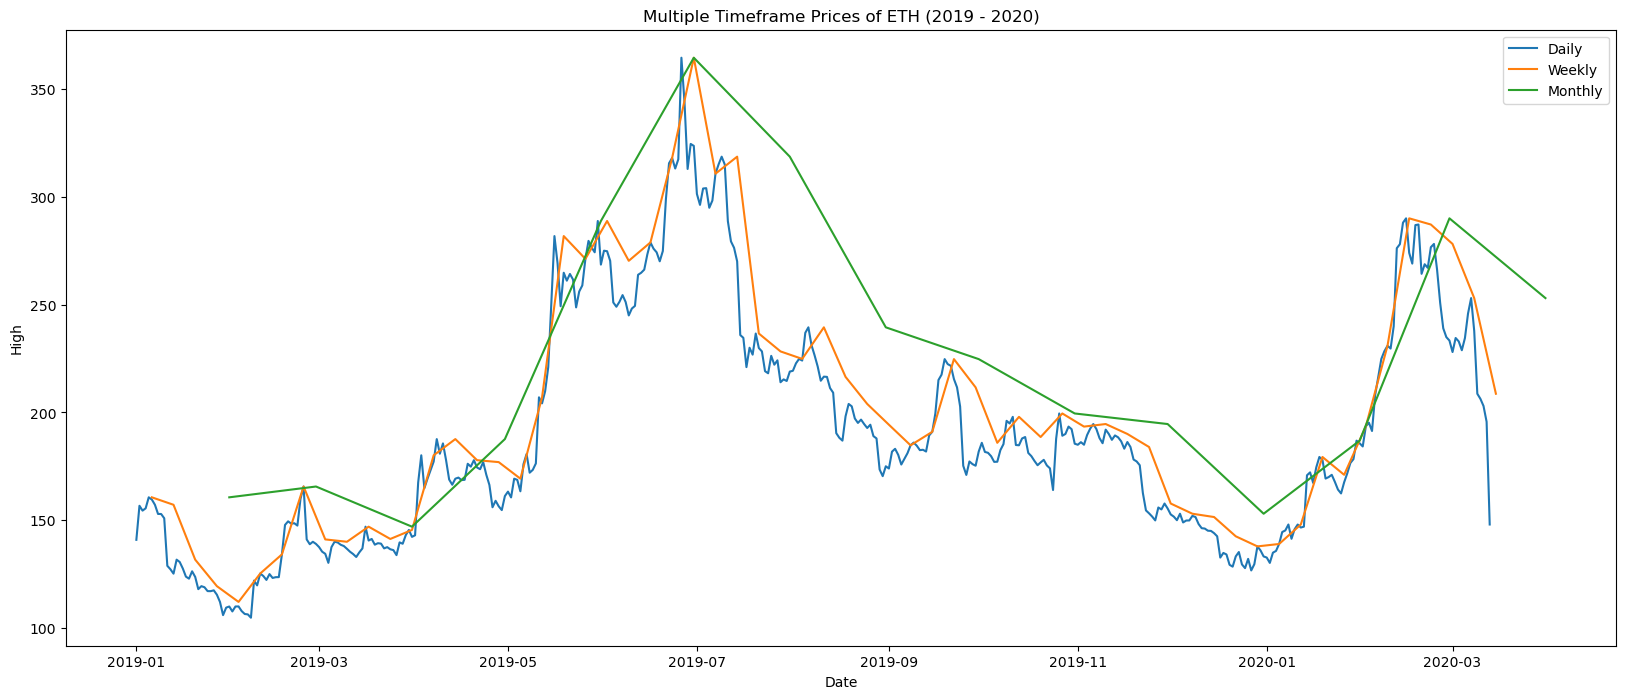

In [26]:
plt.figure(figsize= (20, 8))

plt.title('Multiple Timeframe Prices of ETH (2019 - 2020)')

sns.lineplot(data= df_agg_daily['High'], label= 'Daily')
sns.lineplot(data= df_agg_weekly['High'], label= 'Weekly')
sns.lineplot(data= df_agg_monthly['High'], label= 'Monthly')

plt.legend()
plt.show()

# Kesimpulan

Dari artikel ini, kita sudah mengenal konsep dan penggunaan fungsi resample pada Python. Fungsi resample sangat berguna untuk mengubah frekuensi data time series, baik untuk downsampling (mengurangi frekuensi) maupun upsampling (meningkatkan frekuensi).

Dalam proses resampling, kita dapat menggunakan argumen seperti frequency alias, seperti 'D' untuk harian, 'W' untuk mingguan, 'M' untuk bulanan, dan sebagainya. Kita juga dapat menentukan interval waktu yang diinginkan, misalnya '30T' untuk setiap 30 menit.

Selain itu, dalam artikel ini kita juga mempelajari cara menangani missing value saat melakukan upsampling. Beberapa pendekatan yang umum digunakan adalah menggunakan forward fill (mengisi dengan nilai terakhir yang diketahui), backward fill (mengisi dengan nilai berikutnya yang tersedia), atau menggunakan metode interpolasi seperti interpolasi linear, polynomial, atau spline. Pemilihan metode untuk mengisi missing value tergantung dari karakteristik data dan tujuan alanlisis yang sedang kita lakukan.

Dengan menggunakan fungsi resample pada Python, kita dapat dengan mudah memanipulasi frekuensi data datatime sesuai kebutuhan kita. Hal ini sangat berguna saat melakukan analisa ataupun menampilkan visualisasi data dengan berbagai frekuensi waktu.